0.09919


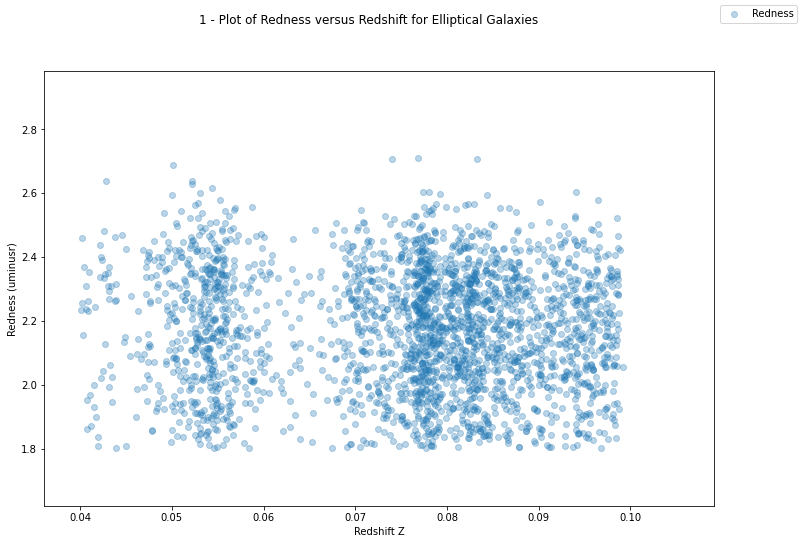

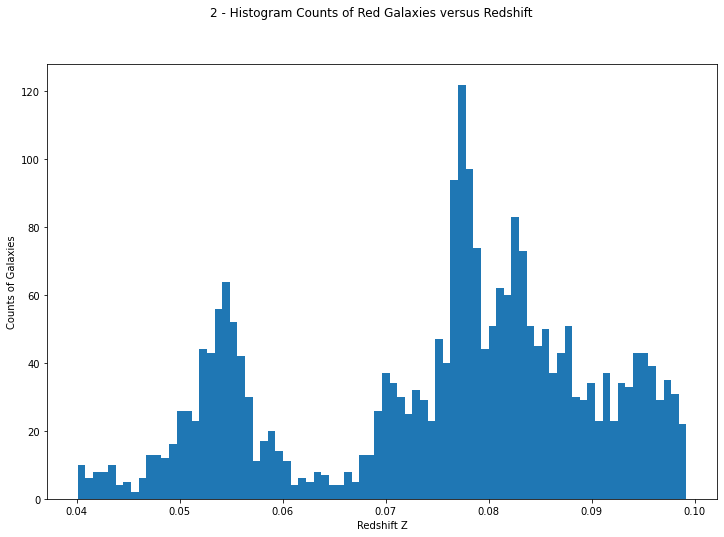

[10, 6, 8, 8, 10, 4, 5, 2, 6, 13, 13, 12, 16, 26, 26, 23, 44, 43, 56, 64, 52, 42, 30, 11, 17, 20, 14, 11, 4, 6, 5, 8, 7, 4, 4, 8, 5, 13, 13, 26, 37, 34, 30, 25, 32, 29, 23, 47, 40, 94, 122, 97, 74, 44, 51, 62, 60, 83, 73, 51, 45, 50, 37, 43, 51, 30, 29, 34, 23, 37, 23, 34, 33, 43, 43, 39, 29, 35, 31, 22]


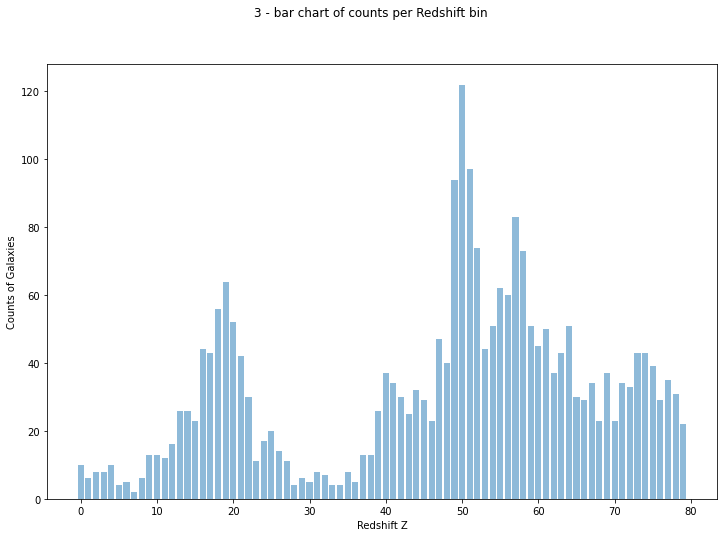

In [12]:
from astropy.table import Table, join
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
RedEllipticalMasses = Table.read('../../GAMA_Data/REMassEClassEmeasure.fits')

#print(len(RedEllipticalMasses))

alphaVal = 0.3


##### Plot of Redness versus Redshift for Elliptical Galaxies
fig, ax = plt.subplots(1, 1, figsize=(12,8)) # make the figure with the size 10 x 8 inches
fig.suptitle("1 - Plot of Redness versus Redshift for Elliptical Galaxies")
ax.set_xlabel('Redshift Z')
ax.set_ylabel('Redness (uminusr)')
x = RedEllipticalMasses['Z_1']
print(max(x))
y = RedEllipticalMasses['uminusr']
ax.scatter(x,y,alpha=alphaVal,label='Redness')
fig.legend(loc="upper right")
plt.axis([0.9*min(x), 1.1*max(x), 0.9*min(y), 1.1*max(y)])
plt.show()

##### Plot of Histogram of Counts of Red elliptical Galaxies versus Red Shift

RedEllipticalMasses.keep_columns(['uminusr','Z_1'])
RedEllipticalMasses.sort(['Z_1','uminusr'])
counts, bins = np.histogram(RedEllipticalMasses['Z_1'].data,bins=80)
fig, ax = plt.subplots(1, 1, figsize=(12,8)) # make the figure with the size 10 x 8 inches
fig.suptitle("2 - Histogram Counts of Red Galaxies versus Redshift")
ax.set_xlabel('Redshift Z')
ax.set_ylabel('Counts of Galaxies')
plt.hist(bins[:-1], bins, weights=counts)
plt.show()

##### Plot of Histogram of Stacked Counts of Red elliptical Galaxies versus Red Shift
REMrange1 = RedEllipticalMasses[RedEllipticalMasses[RedEllipticalMasses['uminusr']>1.8]['uminusr'] <2.0]
#print(len(REMrange1))
counts1, bins1 = np.histogram(REMrange1['Z_1'],bins=bins)
#print(bins1)
REMrange2a = RedEllipticalMasses[RedEllipticalMasses['uminusr']>2.0]
REMrange2 = REMrange2a[REMrange2a['uminusr'] <2.2]
counts2, bins2 = np.histogram(REMrange2['Z_1'],bins=bins)
REMrange3a = RedEllipticalMasses[RedEllipticalMasses['uminusr']>2.2]
REMrange3 = REMrange3a[REMrange3a['uminusr'] <2.4]
counts3, bins3 = np.histogram(REMrange3['Z_1'],bins=bins)
REMrange4a = RedEllipticalMasses[RedEllipticalMasses['uminusr']>2.4]
REMrange4 = REMrange4a[REMrange4a['uminusr'] <2.6]
counts4, bins4 = np.histogram(REMrange4['Z_1'],bins=bins)
REMrange5a = RedEllipticalMasses[RedEllipticalMasses['uminusr']>2.6]
REMrange5 = REMrange5a[REMrange5a['uminusr'] <2.8]
counts5, bins5 = np.histogram(REMrange5['Z_1'],bins=bins)
counts = [counts1, counts2, counts3, counts4, counts5] 
#centers = [centers for _ in counts] 
#fig, ax = plt.subplots(1, 1, figsize=(12,8)) # make the figure with the size 10 x 8 inches
#fig.suptitle("2 - Histogram Counts of Red Galaxies versus Redshift")
#ax.set_xlabel('Redshift Z')
#ax.set_ylabel('Counts of Galaxies')
#plt.hist(centers, bins=bins, weights=counts, stacked=True)
#plt.show()

#### FFT 2D
#print(type(RedEllipticalMasses))
import numpy
#from scipy import fftpack
#import scipy
#print(numpy.__version__)
import astropy
#print(astropy.__version__)
#print(RedEllipticalMasses['Z_1'].dtype)
#print(dir(RedEllipticalMasses))
#print(len(RedEllipticalMasses))
#print(bins)
#print(len(bins))
#print(counts)
#print(len(counts))
#print(len(counts[0]))
#print(dir(counts))
sums = [0]*80
for i in counts :
    #print(i)
    for j in range(0,80) :
        sums[j]=sums[j]+i[j]
print(sums)


#### Check bar chart of sums looks the same
fig, ax = plt.subplots(1, 1, figsize=(12,8)) # make the figure with the size 10 x 8 inches
fig.suptitle("3 - bar chart of counts per Redshift bin")
y_pos = np.arange(80)
ax.bar(y_pos, sums, align='center', alpha=0.5)
ax.set_xlabel('Redshift Z')
ax.set_ylabel('Counts of Galaxies')
plt.show()

